In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
#from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn import metrics

In [16]:
df = pd.read_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/DATASET/AAPL.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.151497,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.546280,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.085480,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.111170,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.228085,283192000


In [17]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

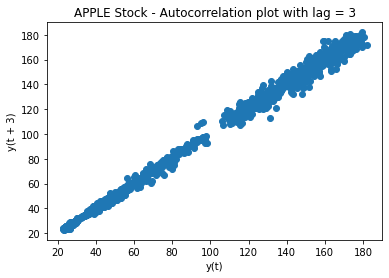

In [18]:
plt.figure()
lag_plot(df['Close'], lag=3)
plt.title('APPLE Stock - Autocorrelation plot with lag = 3')
plt.show()

In [19]:
int(len(df)*0.7)

1204

In [20]:
df.shape

(1721, 7)

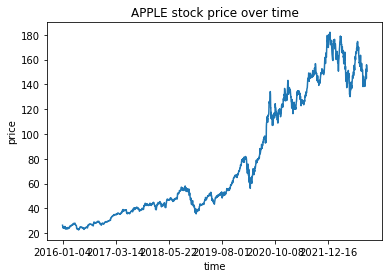

In [21]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0,1721, 300), df['Date'][0:1721:300])
plt.title("APPLE stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [22]:
# divide the data into a training (70 % ) and test (30%) set.
#p=4, d=1, q=0
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = sm.tsa.arima.ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)


In [23]:
MAE_error = metrics.mean_absolute_error(test_data, model_predictions)
RMSE_error = np.sqrt(metrics.mean_squared_error(test_data, model_predictions))
MSE_error = metrics.mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))
print('Testing Mean Absolute Error is {}'.format(MAE_error))
print('Testing Root Mean Squared Error is {}'.format(RMSE_error))

Testing Mean Squared Error is 7.79285972549541
Testing Mean Absolute Error is 2.1143265472610797
Testing Root Mean Squared Error is 2.7915694018769104


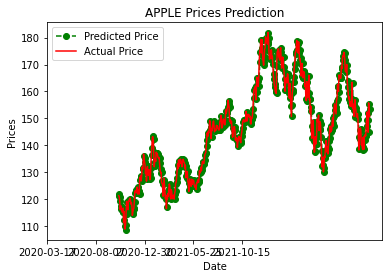

In [24]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='green', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('APPLE Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
#plt.xticks(np.arange(1204,1721,100), df.Date[1204:1721:100])
plt.xticks(np.arange(1057,1510,100), df.Date[1057:1510:100])
plt.legend()
plt.show()

In [25]:
arr = np.array(model_predictions)
print(arr)

[121.85801854 120.97080771 120.74627428 119.26555966 116.29150461
 117.19546731 117.04946116 115.88262884 115.07682368 115.02565766
 116.41183805 111.98361611 114.4971719  110.09262465 108.45003937
 110.12756236 114.39505735 118.7054462  118.85385872 116.43062511
 115.81912518 119.06632922 119.4421978  119.1605964  120.11908117
 119.55978154 118.14893186 118.50582547 117.58435926 114.26238378
 114.86513048 116.05517482 116.57249863 118.70679191 122.33680259
 123.14583792 122.8707784  122.26382043 123.528874   124.38018993
 122.11716171 122.9151048  122.61282954 121.83898157 127.03916329
 128.08612751 128.51686049 126.83180874 127.92784814 131.49389455
 131.22241703 131.72017348 136.09074956 135.28639378 133.75788094
 132.73142246 129.83445606 130.72290606 127.28086919 130.1953586
 132.07588141 129.53738939 128.60222907 130.59038546 129.31423006
 127.32286591 127.65033722 131.51444444 136.40497439 138.91319457
 142.48847705 143.21641423 142.14556815 137.48785395 132.24125558
 133.811608

In [29]:
df = pd.DataFrame(arr, columns =['Open'])
print("\nPandas DataFrame: ")
df


Pandas DataFrame: 


,Open
0,121.858019
1,120.970808
2,120.746274
3,119.265560
4,116.291505
...,...
512,152.011392
513,149.466090
514,145.046630
515,155.261578


In [27]:
df.to_csv("C:/Users/Lenovo/Documents/fda project/Customer-Segmentation-and-Stock-market-prediction-for-portfolio-generation--main/FinalModel/ARIMA/Predictions_AAPL.csv",index=None)

In [28]:
df.head(5)
#type(df.iloc[1,1])

,Open
0,121.858019
1,120.970808
2,120.746274
3,119.265560
4,116.291505
